In [1]:
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [3]:
df = pd.read_csv("/kaggle/input/interview-selection-dataset/Data - Base.csv")
df.shape

(21256, 52)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21256 entries, 0 to 21255
Data columns (total 52 columns):
 #   Column                                                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                                                             --------------  -----  
 0   Name                                                                                                                                               21256 non-null  object 
 1   Age                                                                                                                                                21256 non-null  object 
 2   Gender                                                                                                                                             21256 non-null  object 
 3   Type o

In [5]:
df.isna().sum()

Name                                                                                                                                                    0
Age                                                                                                                                                     0
Gender                                                                                                                                                  0
Type of Graduation/Post Graduation                                                                                                                      0
Marital status                                                                                                                                          0
Mode of interview given by candidate?                                                                                                                   0
Pre Interview Check                                                         

In [6]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(18681, 52)

In [7]:
df.duplicated().sum()

0

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [9]:
df.isna().sum()

Name                                                                                                                                                 0
Age                                                                                                                                                  0
Gender                                                                                                                                               0
Type of Graduation/Post Graduation                                                                                                                   0
Marital status                                                                                                                                       0
Mode of interview given by candidate?                                                                                                                0
Pre Interview Check                                                                           

In [10]:
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()

In [11]:
df.columns

Index(['name', 'age', 'gender', 'type_of_graduation/post_graduation',
       'marital_status', 'mode_of_interview_given_by_candidate?',
       'pre_interview_check', 'fluency_in_english_based_on_introduction',
       'confidence_based_on_introduction_(english)',
       'confidence_based_on_the_topic_given',
       'confidence_based_on_the_ppt_question',
       'confidence_based_on_the_sales_scenario',
       'structured_thinking_(in_regional_only)',
       'structured_thinking_based_on_the_ppt_question',
       'structured_thinking(_call_pitch)',
       'regional_fluency_based_on_the_topic_given',
       'regional_fluency_based_on_the_ppt_question',
       'regional_fluency_based_on_the__sales_scenario',
       'does_the_candidate_has_mother_tongue_influence_while_speaking_english.',
       'has_acquaintance_in_company_and_has_spoken_to_him/her_before_applying?',
       'candidate_status', 'last_fixed_ctc_(lakhs)', 'currently_employed',
       'experienced_candidate_-_(experience_in_mo

In [12]:
df.rename(columns={'does_the_candidate_has_mother_tongue_influence_while_speaking_english': 'mother_tongue_influence',
                   'has_acquaintance_in_company_and_has_spoken_to_him/her_before_applying?	' : 'spoken_before_applying?',
                   "but,_my_child's_exam_are_going_on_now,_so_we_will_keep_the_counselling_session_after_the_exams_get_over.(time:_favourable_pitch:_counsellor_hype)" : "father_reply",
                   "sir_being_in_education_industry_i_know_this_is_a_marketing_gimmick_and_at_the_end_of_the_day_you'll_be_selling_the_app.": "reply_being_in_education",
                   "mode_of_interview_given_by_candidate?" :"interview_mode",
                   'does_the_candidate_has_mother_tongue_influence_while_speaking_english.':'mother_tongue_influence',
                   'has_acquaintance_in_company_and_has_spoken_to_him/her_before_applying?':'acquaintance_in_company',
                   'call-pitch_elements_used_during_the_call_sales_scenario': 'call_pitch_elements',
                   'whether_joined_the_company_or_not':'joined_or_not'
                  },inplace=True)

In [13]:
df['joined_or_not'] = df['joined_or_not'].map({'Joined': 1, 'Yes':1, 'No':0, 'Not Joined': 0})

In [14]:
df['age'] = df['age'].replace('32+', '32').astype(int)

In [15]:
bins = [0, 19, 21, 24, 27, 30, 32, float('inf')]
labels = ['0-19', '20-21', '22-24', '25-27', '28-30', '31-32', '60+']

df['age'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18681 entries, 0 to 18680
Data columns (total 52 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   name                                              18681 non-null  object  
 1   age                                               18681 non-null  category
 2   gender                                            18681 non-null  object  
 3   type_of_graduation/post_graduation                18681 non-null  object  
 4   marital_status                                    18681 non-null  object  
 5   interview_mode                                    18681 non-null  object  
 6   pre_interview_check                               18681 non-null  object  
 7   fluency_in_english_based_on_introduction          18681 non-null  object  
 8   confidence_based_on_introduction_(english)        18681 non-null  object  
 9   confid

In [17]:
num_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['joined_or_not'])
num_df.head()

,confidence_based_on_introduction_(english).1,confidence_based_on_the_topic_given__.1,confidence_based_on_the_ppt_question.1,confidence_based_on_the_sales_scenario.1,structured_thinking_(in_regional_only).1,structured_thinking_based_on_the_ppt_question.1,structured_thinking(_call_pitch).1,regional_fluency_based_on_the_topic_given__.1,regional_fluency_based_on_the_ppt_question.1,regional_fluency_based_on_the__sales_scenario.1,confidence_score,structured_thinking_score,regional_fluency_score,total_score
0,3,2,3,3,2,3,2,1,1.0,1.0,11,7,3,42
1,3,3,3,3,3,3,3,3,3.0,3.0,12,9,9,60
2,2,3,2,3,3,3,3,3,1.0,3.0,10,9,7,52
3,3,3,3,3,3,3,3,3,3.0,3.0,12,9,9,60
4,2,3,2,3,2,2,1,3,1.0,3.0,10,5,7,44


# Standard scaling

In [18]:
scaler = StandardScaler()
num_df_scaled = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)

# Original replace with new
df = df.drop(columns=num_df.columns) 
df = pd.concat([df, num_df_scaled], axis=1)  
df.shape

(18681, 52)

In [19]:
df

,name,age,gender,type_of_graduation/post_graduation,marital_status,interview_mode,pre_interview_check,fluency_in_english_based_on_introduction,confidence_based_on_introduction_(english),confidence_based_on_the_topic_given,...,structured_thinking_(in_regional_only).1,structured_thinking_based_on_the_ppt_question.1,structured_thinking(_call_pitch).1,regional_fluency_based_on_the_topic_given__.1,regional_fluency_based_on_the_ppt_question.1,regional_fluency_based_on_the__sales_scenario.1,confidence_score,structured_thinking_score,regional_fluency_score,total_score
0,parida,25-27,Female,Masters in data science,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,...,-0.618598,1.020654,-0.424411,-1.092966,-1.063625,-1.043289,0.951490,-0.022276,-1.320677,-0.198863
1,shreej,28-30,Female,BSc or MSc,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,...,0.985514,1.020654,1.006713,0.979581,1.024503,1.060405,1.415087,1.256178,1.264403,1.509342
2,ms6744,25-27,Female,B.E / B-Tech,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,...,0.985514,1.020654,1.006713,0.979581,-1.063625,1.060405,0.487893,1.256178,0.402709,0.750139
3,aswalu,22-24,Male,B.E / B-Tech,Unmarried,Laptop,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,...,0.985514,1.020654,1.006713,0.979581,1.024503,1.060405,1.415087,1.256178,1.264403,1.509342
4,aniket,22-24,Male,BA/MA,Unmarried,Mobile,Proceed with the Interview,Taking gaps while speaking due to lack of cont...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,...,-0.618598,-0.556030,-1.855535,0.979581,-1.063625,1.060405,0.487893,-1.300729,0.402709,-0.009063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18676,rajivt,28-30,Male,BSc or MSc,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,...,0.985514,-0.556030,1.006713,-1.092966,-1.063625,1.060405,1.415087,0.616951,-0.458984,0.560339
18677,amitmk,25-27,Male,B.E / B-Tech,Unmarried,Mobile,Proceed with the Interview,Taking gaps while speaking due to lack of cont...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,...,-0.618598,-0.556030,1.006713,0.979581,1.024503,1.060405,0.487893,-0.022276,1.264403,0.750139
18678,Seshag,31-32,Male,B.ARC,Married,Laptop,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,...,0.985514,1.020654,1.006713,0.979581,1.024503,1.060405,1.415087,1.256178,1.264403,1.509342
18679,melbin,25-27,Male,B.E / B-Tech,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,...,0.985514,1.020654,1.006713,0.979581,1.024503,1.060405,0.951490,1.256178,1.264403,1.319541


In [20]:
print(df.shape)  # Original DF size
print(num_df_scaled.shape)  # Scaled DF size


(18681, 52)
(18681, 14)


# object data

In [21]:
cat_df = df.select_dtypes(include=['object']).drop(columns=['name'])
cat_df.head()

,gender,type_of_graduation/post_graduation,marital_status,interview_mode,pre_interview_check,fluency_in_english_based_on_introduction,confidence_based_on_introduction_(english),confidence_based_on_the_topic_given,confidence_based_on_the_ppt_question,confidence_based_on_the_sales_scenario,...,call_pitch_elements,father_reply,let_me_discuss_it_with_my_child,reply_being_in_education,role_acceptance,interview_verdict,candidate_is_willing_to_relocate,role_location_to_be_given_to_the_candidate,comments,redflags_comments_in_interview
0,Female,Masters in data science,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the sal...,...,Purpose of Call (Book a Counselling Session),Urgency using Time,None of the above,None of the above,Yes : Think and says yes.(Shows some hesitation),Reject,Yes - Anywhere Within a City,Bangalore,"Lipsa is 25 female from Orissa, Family BG - Fa...",At least Graduated ( not 12th Pass or diploma ...
1,Female,BSc or MSc,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the sal...,...,"Introduction (Self Intro,Company Name), Purpos...",Asking Questions,None of the above,Non chargeable session,Emphatic Yes,Reject,Yes - Anywhere in PAN India,Delhi,29 yo / female / unmarried / MSc Finance UK 20...,Not Rehire (CDT have not joined byjus in sales...
2,Female,B.E / B-Tech,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the sal...,...,"Introduction (Self Intro,Company Name)",Urgency using Time,Decision Making: Major decision of child futur...,Non chargeable session,Emphatic Yes,Premium Select,Yes - Anywhere Within a City,Chennai,nm,Not working currently and ready to join the R3...
3,Male,B.E / B-Tech,Unmarried,Laptop,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the sal...,...,"Introduction (Self Intro,Company Name), Purpos...","Urgency using Time, Urgency using situation",None of the above,Value creation(Nothing comes for free),Emphatic Yes,Premium Select,Yes - Anywhere in PAN India,Delhi,Final Interview Done 22YRS //UTTARAKHAND // F...,Not Rehire (CDT have not joined byjus in sales...
4,Male,BA/MA,Unmarried,Mobile,Proceed with the Interview,Taking gaps while speaking due to lack of cont...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the sal...,...,None of the Above,Urgency by creating counsellor Hype,Anticipation of objection from child's end:,Value creation(Nothing comes for free),Yes : Think and says yes.(Shows some hesitation),Borderline Select,No - Want Specific Centre Location Only,Bangalore,"Aniket is 22 male from Bhopal, BA Grad 21, Fam...","Age is below 32.11, At least Graduated ( not 1..."


In [22]:
cat_df.columns

Index(['gender', 'type_of_graduation/post_graduation', 'marital_status',
       'interview_mode', 'pre_interview_check',
       'fluency_in_english_based_on_introduction',
       'confidence_based_on_introduction_(english)',
       'confidence_based_on_the_topic_given',
       'confidence_based_on_the_ppt_question',
       'confidence_based_on_the_sales_scenario',
       'structured_thinking_(in_regional_only)',
       'structured_thinking_based_on_the_ppt_question',
       'structured_thinking(_call_pitch)',
       'regional_fluency_based_on_the_topic_given',
       'regional_fluency_based_on_the_ppt_question',
       'regional_fluency_based_on_the__sales_scenario',
       'mother_tongue_influence', 'acquaintance_in_company',
       'candidate_status', 'last_fixed_ctc_(lakhs)', 'currently_employed',
       'experienced_candidate_-_(experience_in_months)',
       'experienced_candidate_(nature_of_work)', 'what_was_the_type_of_role?',
       'how_many_slides_candidate_have_submitted_in_

In [23]:
# Define the columns to use for creating 'tag'
custom_object_tag = ['gender',
                     'type_of_graduation/post_graduation',
                     'marital_status',
                     'interview_mode',
                     'pre_interview_check',
                     'fluency_in_english_based_on_introduction',
                     'confidence_based_on_introduction_(english)',
                     'confidence_based_on_the_topic_given',
                     'confidence_based_on_the_ppt_question',
                     'confidence_based_on_the_sales_scenario',
                     'structured_thinking_(in_regional_only)',
                     'structured_thinking_based_on_the_ppt_question',
                     'structured_thinking(_call_pitch)',
                     'regional_fluency_based_on_the_topic_given',
                     'regional_fluency_based_on_the_ppt_question',
                     'regional_fluency_based_on_the__sales_scenario',
                     'mother_tongue_influence',
                     'acquaintance_in_company',
                     'candidate_status',
                     'last_fixed_ctc_(lakhs)',
                     'currently_employed',
                     'experienced_candidate_-_(experience_in_months)',
                     'experienced_candidate_(nature_of_work)',
                     'what_was_the_type_of_role?',
                     'how_many_slides_candidate_have_submitted_in_ppt?',
                     'call_pitch_elements',
                     'father_reply',
                     'let_me_discuss_it_with_my_child',
                     'reply_being_in_education',
                     'role_acceptance',
                     'interview_verdict',
                     'candidate_is_willing_to_relocate',
                     'role_location_to_be_given_to_the_candidate',
                     'comments',
                     'redflags_comments_in_interview'
                    ]

df['meta_tag'] = df[custom_object_tag].fillna('').astype(str).agg(' | '.join, axis=1)
df.head()

,name,age,gender,type_of_graduation/post_graduation,marital_status,interview_mode,pre_interview_check,fluency_in_english_based_on_introduction,confidence_based_on_introduction_(english),confidence_based_on_the_topic_given,...,structured_thinking_based_on_the_ppt_question.1,structured_thinking(_call_pitch).1,regional_fluency_based_on_the_topic_given__.1,regional_fluency_based_on_the_ppt_question.1,regional_fluency_based_on_the__sales_scenario.1,confidence_score,structured_thinking_score,regional_fluency_score,total_score,meta_tag
0,parida,25-27,Female,Masters in data science,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,...,1.020654,-0.424411,-1.092966,-1.063625,-1.043289,0.951490,-0.022276,-1.320677,-0.198863,Female | Masters in data science | Unmarried |...
1,shreej,28-30,Female,BSc or MSc,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,...,1.020654,1.006713,0.979581,1.024503,1.060405,1.415087,1.256178,1.264403,1.509342,Female | BSc or MSc | Unmarried | Mobile | Pro...
2,ms6744,25-27,Female,B.E / B-Tech,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,...,1.020654,1.006713,0.979581,-1.063625,1.060405,0.487893,1.256178,0.402709,0.750139,Female | B.E / B-Tech | Unmarried | Mobile | P...
3,aswalu,22-24,Male,B.E / B-Tech,Unmarried,Laptop,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,...,1.020654,1.006713,0.979581,1.024503,1.060405,1.415087,1.256178,1.264403,1.509342,Male | B.E / B-Tech | Unmarried | Laptop | Pro...
4,aniket,22-24,Male,BA/MA,Unmarried,Mobile,Proceed with the Interview,Taking gaps while speaking due to lack of cont...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,...,-0.556030,-1.855535,0.979581,-1.063625,1.060405,0.487893,-1.300729,0.402709,-0.009063,Male | BA/MA | Unmarried | Mobile | Proceed wi...


In [24]:
df.drop(columns=custom_object_tag, inplace=True)

In [25]:
df.shape

(18681, 18)

In [26]:
df.head()

,name,age,joined_or_not,confidence_based_on_introduction_(english).1,confidence_based_on_the_topic_given__.1,confidence_based_on_the_ppt_question.1,confidence_based_on_the_sales_scenario.1,structured_thinking_(in_regional_only).1,structured_thinking_based_on_the_ppt_question.1,structured_thinking(_call_pitch).1,regional_fluency_based_on_the_topic_given__.1,regional_fluency_based_on_the_ppt_question.1,regional_fluency_based_on_the__sales_scenario.1,confidence_score,structured_thinking_score,regional_fluency_score,total_score,meta_tag
0,parida,25-27,0,1.196219,-0.432008,1.136634,1.164132,-0.618598,1.020654,-0.424411,-1.092966,-1.063625,-1.043289,0.951490,-0.022276,-1.320677,-0.198863,Female | Masters in data science | Unmarried |...
1,shreej,28-30,0,1.196219,1.126275,1.136634,1.164132,0.985514,1.020654,1.006713,0.979581,1.024503,1.060405,1.415087,1.256178,1.264403,1.509342,Female | BSc or MSc | Unmarried | Mobile | Pro...
2,ms6744,25-27,1,-0.390782,1.126275,-0.371960,1.164132,0.985514,1.020654,1.006713,0.979581,-1.063625,1.060405,0.487893,1.256178,0.402709,0.750139,Female | B.E / B-Tech | Unmarried | Mobile | P...
3,aswalu,22-24,1,1.196219,1.126275,1.136634,1.164132,0.985514,1.020654,1.006713,0.979581,1.024503,1.060405,1.415087,1.256178,1.264403,1.509342,Male | B.E / B-Tech | Unmarried | Laptop | Pro...
4,aniket,22-24,0,-0.390782,1.126275,-0.371960,1.164132,-0.618598,-0.556030,-1.855535,0.979581,-1.063625,1.060405,0.487893,-1.300729,0.402709,-0.009063,Male | BA/MA | Unmarried | Mobile | Proceed wi...


In [27]:
df.shape

(18681, 18)

In [28]:
df.iloc[0, -1]

'Female | Masters in data science | Unmarried | Mobile | Proceed with the Interview | Able to speak sentences in a clear/coherent way. Smooth talker with one or two hiccups. | Impactful - Good confidence throughout the Introduction with energy | Guarded Confidence - Confident in some areas and ordinary in others | Impactful - Good confidence throughout the Introduction with energy | Impactful - Good confidence throughout the sales scenario with energy | Scripted  : To the point | Logical and Structured : Detailed explanation | Scripted - Product Features/Repetitive content/Not Asking questions | Taking gaps while speaking due to lack of content but does not stammer or stutter | Taking gaps while speaking due to lack of content but does not stammer or stutter | Taking gaps while speaking due to lack of content but does not stammer or stutter | No | No | Experienced in non client facing(equal to or more than 6 months) | 5-5.99 | No | 6-11.99 Months | tech | Fresher | More than 6 slides |

In [29]:
df.loc[1,'meta_tag']

"Female | BSc or MSc | Unmarried | Mobile | Proceed with the Interview | Able to speak sentences in a clear/coherent way. Smooth talker with one or two hiccups. | Impactful - Good confidence throughout the Introduction with energy | Impactful - Good confidence throughout the Introduction with energy | Impactful - Good confidence throughout the Introduction with energy | Impactful - Good confidence throughout the sales scenario with energy | Logical and Structured : Detailed explanation | Logical and Structured : Detailed explanation | Logical and Structured - when this flow is followed →  Self intro >Company name>Agenda> | Able to speak sentences in a clear/coherent way. Does not stutter or fumble while speaking/ Smooth talker with one or two hiccups. | Able to speak sentences in a clear/coherent way. Does not stutter or fumble while speaking/ Smooth talker with one or two hiccups. | Able to speak sentences in a clear/coherent way. Does not stutter or fumble while speaking/ Smooth talk

In [30]:
df.loc[2,'meta_tag']

'Female | B.E / B-Tech | Unmarried | Mobile | Proceed with the Interview | Able to speak sentences in a clear/coherent way. Smooth talker with one or two hiccups. | Guarded Confidence - Confident in some areas and ordinary in others | Impactful - Good confidence throughout the Introduction with energy | Guarded Confidence - Confident in some areas and ordinary in others | Impactful - Good confidence throughout the sales scenario with energy | Logical and Structured : Detailed explanation | Logical and Structured : Detailed explanation | Logical and Structured - when this flow is followed →  Self intro >Company name>Agenda> | Able to speak sentences in a clear/coherent way. Does not stutter or fumble while speaking/ Smooth talker with one or two hiccups. | Taking gaps while speaking due to lack of content but does not stammer or stutter | Able to speak sentences in a clear/coherent way. Does not stutter or fumble while speaking/ Smooth talker with one or two hiccups. | Yes | Yes | Fresh

In [31]:
df.loc[3,'meta_tag']

'Male | B.E / B-Tech | Unmarried | Laptop | Proceed with the Interview | Able to speak sentences in a clear/coherent way. Smooth talker with one or two hiccups. | Impactful - Good confidence throughout the Introduction with energy | Impactful - Good confidence throughout the Introduction with energy | Impactful - Good confidence throughout the Introduction with energy | Impactful - Good confidence throughout the sales scenario with energy | Logical and Structured : Detailed explanation | Logical and Structured : Detailed explanation | Logical and Structured - when this flow is followed →  Self intro >Company name>Agenda> | Able to speak sentences in a clear/coherent way. Does not stutter or fumble while speaking/ Smooth talker with one or two hiccups. | Able to speak sentences in a clear/coherent way. Does not stutter or fumble while speaking/ Smooth talker with one or two hiccups. | Able to speak sentences in a clear/coherent way. Does not stutter or fumble while speaking/ Smooth talk

In [32]:
# pip install -U spacy[cuda]

In [33]:
import spacy
spacy.prefer_gpu()

nlp = spacy.load("en_core_web_sm", disable=["ner", "parser"])

def clean_text_pipe(texts):
    return [
        " ".join([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])
        for doc in nlp.pipe(texts, batch_size=100)
    ]

df['meta_tag_cleaned'] = clean_text_pipe(df['meta_tag'].astype(str))

In [34]:
df['meta_tag_cleaned'].head()

0    female Masters datum science Unmarried Mobile ...
1    female BSc MSc Unmarried Mobile proceed Interv...
2    female B tech Unmarried Mobile proceed Intervi...
3    male B tech Unmarried Laptop proceed Interview...
4    male BA MA Unmarried Mobile proceed Interview ...
Name: meta_tag_cleaned, dtype: object

In [35]:
print(df.loc[1,'meta_tag_cleaned'],"\n", df.loc[2,'meta_tag_cleaned'], "\n",df.loc[2,'meta_tag_cleaned'], "\n",df.loc[3,'meta_tag_cleaned'], "\n",df.loc[4,'meta_tag_cleaned'])

female BSc MSc Unmarried Mobile proceed Interview able speak sentence clear coherent way smooth talker hiccup Impactful good confidence introduction energy impactful good confidence introduction energy impactful good confidence introduction energy impactful good confidence sale scenario energy Logical Structured detailed explanation Logical Structured detailed explanation Logical Structured flow follow Self intro Company Agenda able speak sentence clear coherent way stutter fumble Smooth talker hiccup able speak sentence clear coherent way stutter fumble Smooth talker hiccup able speak sentence clear coherent way stutter fumble Smooth talker hiccup month experience Fresher month month Fresher slide introduction Self Intro Company Purpose Book Counselling Session need Generation ask que like student class performance etc ask Questions Non chargeable session Emphatic yes Reject yes PAN India Delhi yo female unmarried MSc Finance UK recently relocate India day ago Odissa father doctor bro

In [36]:
df

,name,age,joined_or_not,confidence_based_on_introduction_(english).1,confidence_based_on_the_topic_given__.1,confidence_based_on_the_ppt_question.1,confidence_based_on_the_sales_scenario.1,structured_thinking_(in_regional_only).1,structured_thinking_based_on_the_ppt_question.1,structured_thinking(_call_pitch).1,regional_fluency_based_on_the_topic_given__.1,regional_fluency_based_on_the_ppt_question.1,regional_fluency_based_on_the__sales_scenario.1,confidence_score,structured_thinking_score,regional_fluency_score,total_score,meta_tag,meta_tag_cleaned
0,parida,25-27,0,1.196219,-0.432008,1.136634,1.164132,-0.618598,1.020654,-0.424411,-1.092966,-1.063625,-1.043289,0.951490,-0.022276,-1.320677,-0.198863,Female | Masters in data science | Unmarried |...,female Masters datum science Unmarried Mobile ...
1,shreej,28-30,0,1.196219,1.126275,1.136634,1.164132,0.985514,1.020654,1.006713,0.979581,1.024503,1.060405,1.415087,1.256178,1.264403,1.509342,Female | BSc or MSc | Unmarried | Mobile | Pro...,female BSc MSc Unmarried Mobile proceed Interv...
2,ms6744,25-27,1,-0.390782,1.126275,-0.371960,1.164132,0.985514,1.020654,1.006713,0.979581,-1.063625,1.060405,0.487893,1.256178,0.402709,0.750139,Female | B.E / B-Tech | Unmarried | Mobile | P...,female B tech Unmarried Mobile proceed Intervi...
3,aswalu,22-24,1,1.196219,1.126275,1.136634,1.164132,0.985514,1.020654,1.006713,0.979581,1.024503,1.060405,1.415087,1.256178,1.264403,1.509342,Male | B.E / B-Tech | Unmarried | Laptop | Pro...,male B tech Unmarried Laptop proceed Interview...
4,aniket,22-24,0,-0.390782,1.126275,-0.371960,1.164132,-0.618598,-0.556030,-1.855535,0.979581,-1.063625,1.060405,0.487893,-1.300729,0.402709,-0.009063,Male | BA/MA | Unmarried | Mobile | Proceed wi...,male BA MA Unmarried Mobile proceed Interview ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18676,rajivt,28-30,1,1.196219,1.126275,1.136634,1.164132,0.985514,-0.556030,1.006713,-1.092966,-1.063625,1.060405,1.415087,0.616951,-0.458984,0.560339,Male | BSc or MSc | Unmarried | Mobile | Proce...,male BSc MSc Unmarried Mobile proceed Intervie...
18677,amitmk,25-27,0,-0.390782,1.126275,-0.371960,1.164132,-0.618598,-0.556030,1.006713,0.979581,1.024503,1.060405,0.487893,-0.022276,1.264403,0.750139,Male | B.E / B-Tech | Unmarried | Mobile | Pro...,male B tech Unmarried Mobile proceed Interview...
18678,Seshag,31-32,0,1.196219,1.126275,1.136634,1.164132,0.985514,1.020654,1.006713,0.979581,1.024503,1.060405,1.415087,1.256178,1.264403,1.509342,Male | B.ARC | Married | Laptop | Proceed with...,male married Laptop proceed Interview able spe...
18679,melbin,25-27,0,1.196219,1.126275,1.136634,-0.251330,0.985514,1.020654,1.006713,0.979581,1.024503,1.060405,0.951490,1.256178,1.264403,1.319541,Male | B.E / B-Tech | Unmarried | Mobile | Pro...,male B tech Unmarried Mobile proceed Interview...


In [37]:
df.loc[3,'meta_tag_cleaned']

'male B tech Unmarried Laptop proceed Interview able speak sentence clear coherent way smooth talker hiccup Impactful good confidence introduction energy impactful good confidence introduction energy impactful good confidence introduction energy impactful good confidence sale scenario energy Logical Structured detailed explanation Logical Structured detailed explanation Logical Structured flow follow Self intro Company Agenda able speak sentence clear coherent way stutter fumble Smooth talker hiccup able speak sentence clear coherent way stutter fumble Smooth talker hiccup able speak sentence clear coherent way stutter fumble Smooth talker hiccup grad Fresher month month Fresher slide introduction Self Intro Company Purpose Book Counselling Session Rapport Building Connect Customer ask que like customer background location language education etc need Generation ask que like student class performance etc Urgency Time urgency situation Value come free Emphatic yes Premium Select yes PAN 

In [38]:
df = df.drop(columns=['meta_tag','name'])
df.shape

(18681, 17)

In [39]:
df.head(10)

,age,joined_or_not,confidence_based_on_introduction_(english).1,confidence_based_on_the_topic_given__.1,confidence_based_on_the_ppt_question.1,confidence_based_on_the_sales_scenario.1,structured_thinking_(in_regional_only).1,structured_thinking_based_on_the_ppt_question.1,structured_thinking(_call_pitch).1,regional_fluency_based_on_the_topic_given__.1,regional_fluency_based_on_the_ppt_question.1,regional_fluency_based_on_the__sales_scenario.1,confidence_score,structured_thinking_score,regional_fluency_score,total_score,meta_tag_cleaned
0,25-27,0,1.196219,-0.432008,1.136634,1.164132,-0.618598,1.020654,-0.424411,-1.092966,-1.063625,-1.043289,0.951490,-0.022276,-1.320677,-0.198863,female Masters datum science Unmarried Mobile ...
1,28-30,0,1.196219,1.126275,1.136634,1.164132,0.985514,1.020654,1.006713,0.979581,1.024503,1.060405,1.415087,1.256178,1.264403,1.509342,female BSc MSc Unmarried Mobile proceed Interv...
2,25-27,1,-0.390782,1.126275,-0.371960,1.164132,0.985514,1.020654,1.006713,0.979581,-1.063625,1.060405,0.487893,1.256178,0.402709,0.750139,female B tech Unmarried Mobile proceed Intervi...
3,22-24,1,1.196219,1.126275,1.136634,1.164132,0.985514,1.020654,1.006713,0.979581,1.024503,1.060405,1.415087,1.256178,1.264403,1.509342,male B tech Unmarried Laptop proceed Interview...
4,22-24,0,-0.390782,1.126275,-0.371960,1.164132,-0.618598,-0.556030,-1.855535,0.979581,-1.063625,1.060405,0.487893,-1.300729,0.402709,-0.009063,male BA MA Unmarried Mobile proceed Interview ...
5,22-24,0,-1.977783,-0.432008,-1.880554,-0.251330,-2.222709,-2.132713,-1.855535,-0.056692,-2.107689,0.008558,-1.366497,-2.579183,-0.889831,-1.717268,male BA MA Unmarried Mobile proceed Interview ...
6,22-24,0,1.196219,-0.432008,-0.371960,1.164132,-0.618598,-0.556030,-0.424411,-1.092966,1.024503,1.060405,0.487893,-0.661503,0.402709,0.180738,female Unmarried Mobile proceed Interview able...
7,25-27,1,-0.390782,-0.432008,-0.371960,-0.251330,-2.222709,-2.132713,1.006713,-1.092966,-1.063625,-1.043289,-0.439302,-1.300729,-1.320677,-1.147866,male M Tech Unmarried Laptop proceed Interview...
8,22-24,1,-0.390782,-0.432008,-0.371960,-1.666791,-0.618598,-0.556030,-1.855535,-1.092966,-1.063625,0.008558,-0.902899,-1.300729,-0.889831,-1.147866,male B tech married Mobile proceed Interview t...
9,25-27,1,-0.390782,1.126275,-0.371960,-0.251330,0.985514,-0.556030,1.006713,0.979581,-1.063625,-1.043289,0.024295,0.616951,-0.458984,-0.009063,male Bachelor commerce Unmarried Laptop procee...


In [40]:
df.loc[1, 'meta_tag_cleaned']

'female BSc MSc Unmarried Mobile proceed Interview able speak sentence clear coherent way smooth talker hiccup Impactful good confidence introduction energy impactful good confidence introduction energy impactful good confidence introduction energy impactful good confidence sale scenario energy Logical Structured detailed explanation Logical Structured detailed explanation Logical Structured flow follow Self intro Company Agenda able speak sentence clear coherent way stutter fumble Smooth talker hiccup able speak sentence clear coherent way stutter fumble Smooth talker hiccup able speak sentence clear coherent way stutter fumble Smooth talker hiccup month experience Fresher month month Fresher slide introduction Self Intro Company Purpose Book Counselling Session need Generation ask que like student class performance etc ask Questions Non chargeable session Emphatic yes Reject yes PAN India Delhi yo female unmarried MSc Finance UK recently relocate India day ago Odissa father doctor br

In [41]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = ["age", "meta_tag_cleaned"]

# Encode categorical columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert text to numbers
    label_encoders[col] = le  # Store encoders for inverse transformation if needed

In [42]:
df.head(10)

,age,joined_or_not,confidence_based_on_introduction_(english).1,confidence_based_on_the_topic_given__.1,confidence_based_on_the_ppt_question.1,confidence_based_on_the_sales_scenario.1,structured_thinking_(in_regional_only).1,structured_thinking_based_on_the_ppt_question.1,structured_thinking(_call_pitch).1,regional_fluency_based_on_the_topic_given__.1,regional_fluency_based_on_the_ppt_question.1,regional_fluency_based_on_the__sales_scenario.1,confidence_score,structured_thinking_score,regional_fluency_score,total_score,meta_tag_cleaned
0,2,0,1.196219,-0.432008,1.136634,1.164132,-0.618598,1.020654,-0.424411,-1.092966,-1.063625,-1.043289,0.951490,-0.022276,-1.320677,-0.198863,3543
1,3,0,1.196219,1.126275,1.136634,1.164132,0.985514,1.020654,1.006713,0.979581,1.024503,1.060405,1.415087,1.256178,1.264403,1.509342,2219
2,2,1,-0.390782,1.126275,-0.371960,1.164132,0.985514,1.020654,1.006713,0.979581,-1.063625,1.060405,0.487893,1.256178,0.402709,0.750139,315
3,1,1,1.196219,1.126275,1.136634,1.164132,0.985514,1.020654,1.006713,0.979581,1.024503,1.060405,1.415087,1.256178,1.264403,1.509342,4472
4,1,0,-0.390782,1.126275,-0.371960,1.164132,-0.618598,-0.556030,-1.855535,0.979581,-1.063625,1.060405,0.487893,-1.300729,0.402709,-0.009063,10071
5,1,0,-1.977783,-0.432008,-1.880554,-0.251330,-2.222709,-2.132713,-1.855535,-0.056692,-2.107689,0.008558,-1.366497,-2.579183,-0.889831,-1.717268,10893
6,1,0,1.196219,-0.432008,-0.371960,1.164132,-0.618598,-0.556030,-0.424411,-1.092966,1.024503,1.060405,0.487893,-0.661503,0.402709,0.180738,3640
7,2,1,-0.390782,-0.432008,-0.371960,-0.251330,-2.222709,-2.132713,1.006713,-1.092966,-1.063625,-1.043289,-0.439302,-1.300729,-1.320677,-1.147866,16726
8,1,1,-0.390782,-0.432008,-0.371960,-1.666791,-0.618598,-0.556030,-1.855535,-1.092966,-1.063625,0.008558,-0.902899,-1.300729,-0.889831,-1.147866,9268
9,2,1,-0.390782,1.126275,-0.371960,-0.251330,0.985514,-0.556030,1.006713,0.979581,-1.063625,-1.043289,0.024295,0.616951,-0.458984,-0.009063,15180


In [43]:
features_to_scale = df.drop(columns=["joined_or_not"])
scaler = StandardScaler()

# Apply StandardScaler
cleaned_df = df.copy()
cleaned_df[features_to_scale.columns] = scaler.fit_transform(features_to_scale)

cleaned_df.head()

,age,joined_or_not,confidence_based_on_introduction_(english).1,confidence_based_on_the_topic_given__.1,confidence_based_on_the_ppt_question.1,confidence_based_on_the_sales_scenario.1,structured_thinking_(in_regional_only).1,structured_thinking_based_on_the_ppt_question.1,structured_thinking(_call_pitch).1,regional_fluency_based_on_the_topic_given__.1,regional_fluency_based_on_the_ppt_question.1,regional_fluency_based_on_the__sales_scenario.1,confidence_score,structured_thinking_score,regional_fluency_score,total_score,meta_tag_cleaned
0,0.611496,0,1.196219,-0.432008,1.136634,1.164132,-0.618598,1.020654,-0.424411,-1.092966,-1.063625,-1.043289,0.951490,-0.022276,-1.320677,-0.198863,-1.074921
1,1.686735,0,1.196219,1.126275,1.136634,1.164132,0.985514,1.020654,1.006713,0.979581,1.024503,1.060405,1.415087,1.256178,1.264403,1.509342,-1.320454
2,0.611496,1,-0.390782,1.126275,-0.371960,1.164132,0.985514,1.020654,1.006713,0.979581,-1.063625,1.060405,0.487893,1.256178,0.402709,0.750139,-1.673547
3,-0.463744,1,1.196219,1.126275,1.136634,1.164132,0.985514,1.020654,1.006713,0.979581,1.024503,1.060405,1.415087,1.256178,1.264403,1.509342,-0.902640
4,-0.463744,0,-0.390782,1.126275,-0.371960,1.164132,-0.618598,-0.556030,-1.855535,0.979581,-1.063625,1.060405,0.487893,-1.300729,0.402709,-0.009063,0.135684


In [44]:
cleaned_df.head()

,age,joined_or_not,confidence_based_on_introduction_(english).1,confidence_based_on_the_topic_given__.1,confidence_based_on_the_ppt_question.1,confidence_based_on_the_sales_scenario.1,structured_thinking_(in_regional_only).1,structured_thinking_based_on_the_ppt_question.1,structured_thinking(_call_pitch).1,regional_fluency_based_on_the_topic_given__.1,regional_fluency_based_on_the_ppt_question.1,regional_fluency_based_on_the__sales_scenario.1,confidence_score,structured_thinking_score,regional_fluency_score,total_score,meta_tag_cleaned
0,0.611496,0,1.196219,-0.432008,1.136634,1.164132,-0.618598,1.020654,-0.424411,-1.092966,-1.063625,-1.043289,0.951490,-0.022276,-1.320677,-0.198863,-1.074921
1,1.686735,0,1.196219,1.126275,1.136634,1.164132,0.985514,1.020654,1.006713,0.979581,1.024503,1.060405,1.415087,1.256178,1.264403,1.509342,-1.320454
2,0.611496,1,-0.390782,1.126275,-0.371960,1.164132,0.985514,1.020654,1.006713,0.979581,-1.063625,1.060405,0.487893,1.256178,0.402709,0.750139,-1.673547
3,-0.463744,1,1.196219,1.126275,1.136634,1.164132,0.985514,1.020654,1.006713,0.979581,1.024503,1.060405,1.415087,1.256178,1.264403,1.509342,-0.902640
4,-0.463744,0,-0.390782,1.126275,-0.371960,1.164132,-0.618598,-0.556030,-1.855535,0.979581,-1.063625,1.060405,0.487893,-1.300729,0.402709,-0.009063,0.135684


# For Visualisation Purpose only

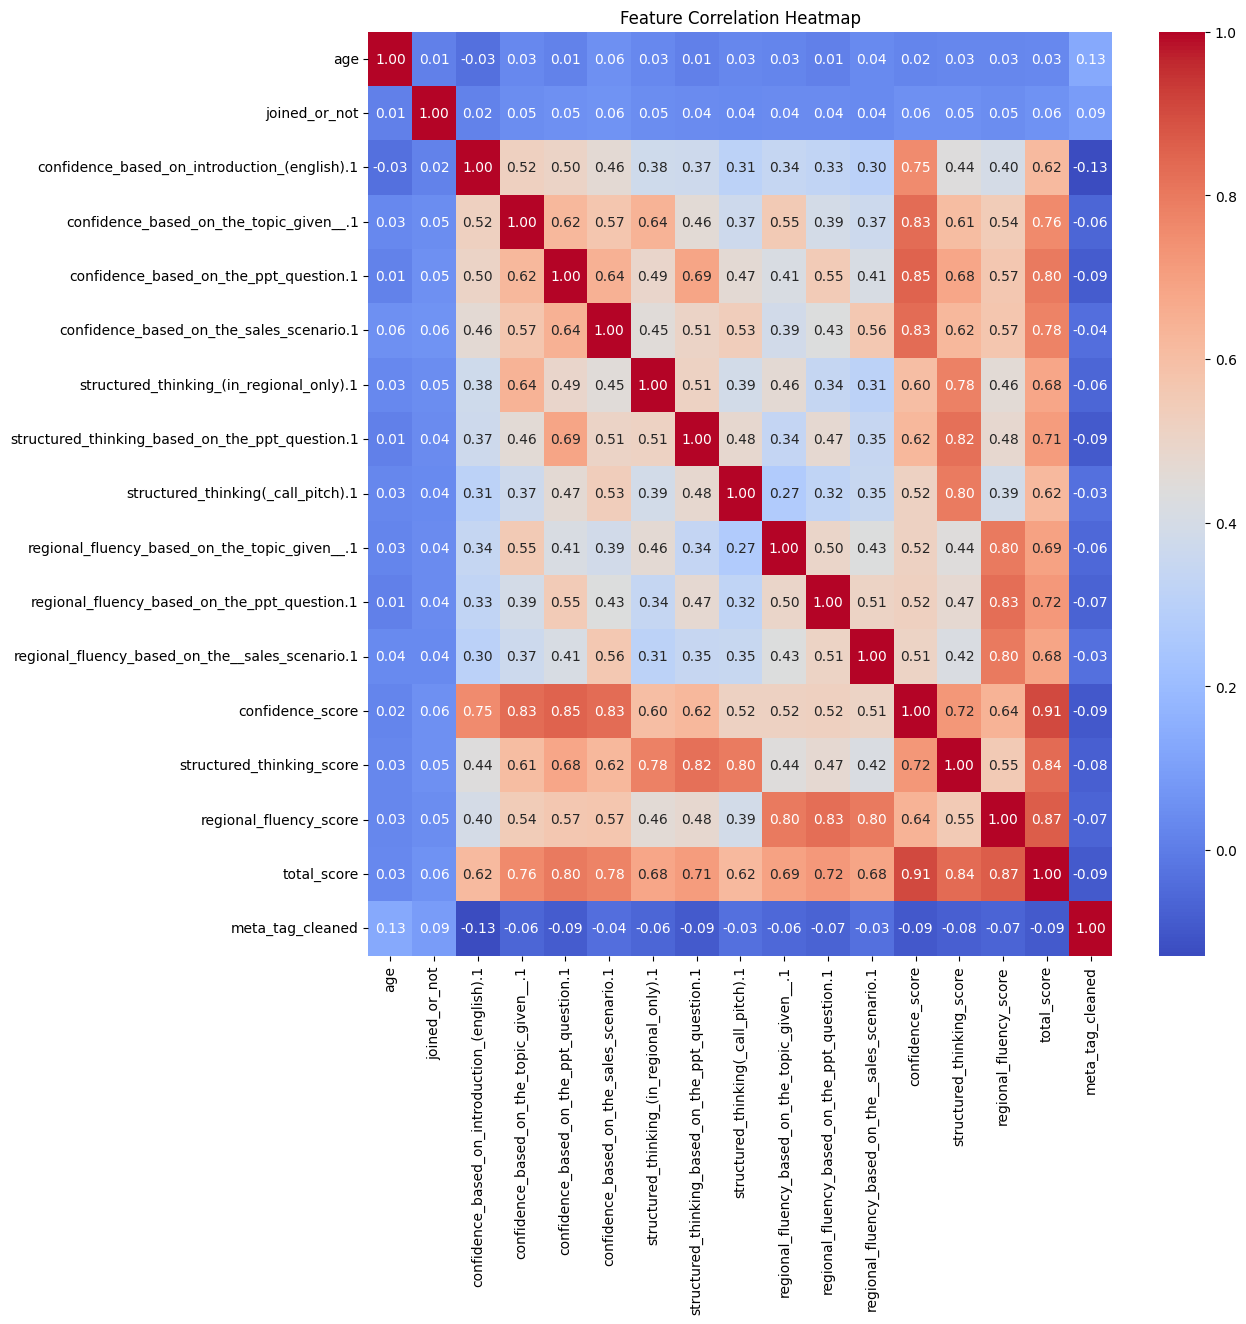

In [45]:
corr_matrix = cleaned_df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


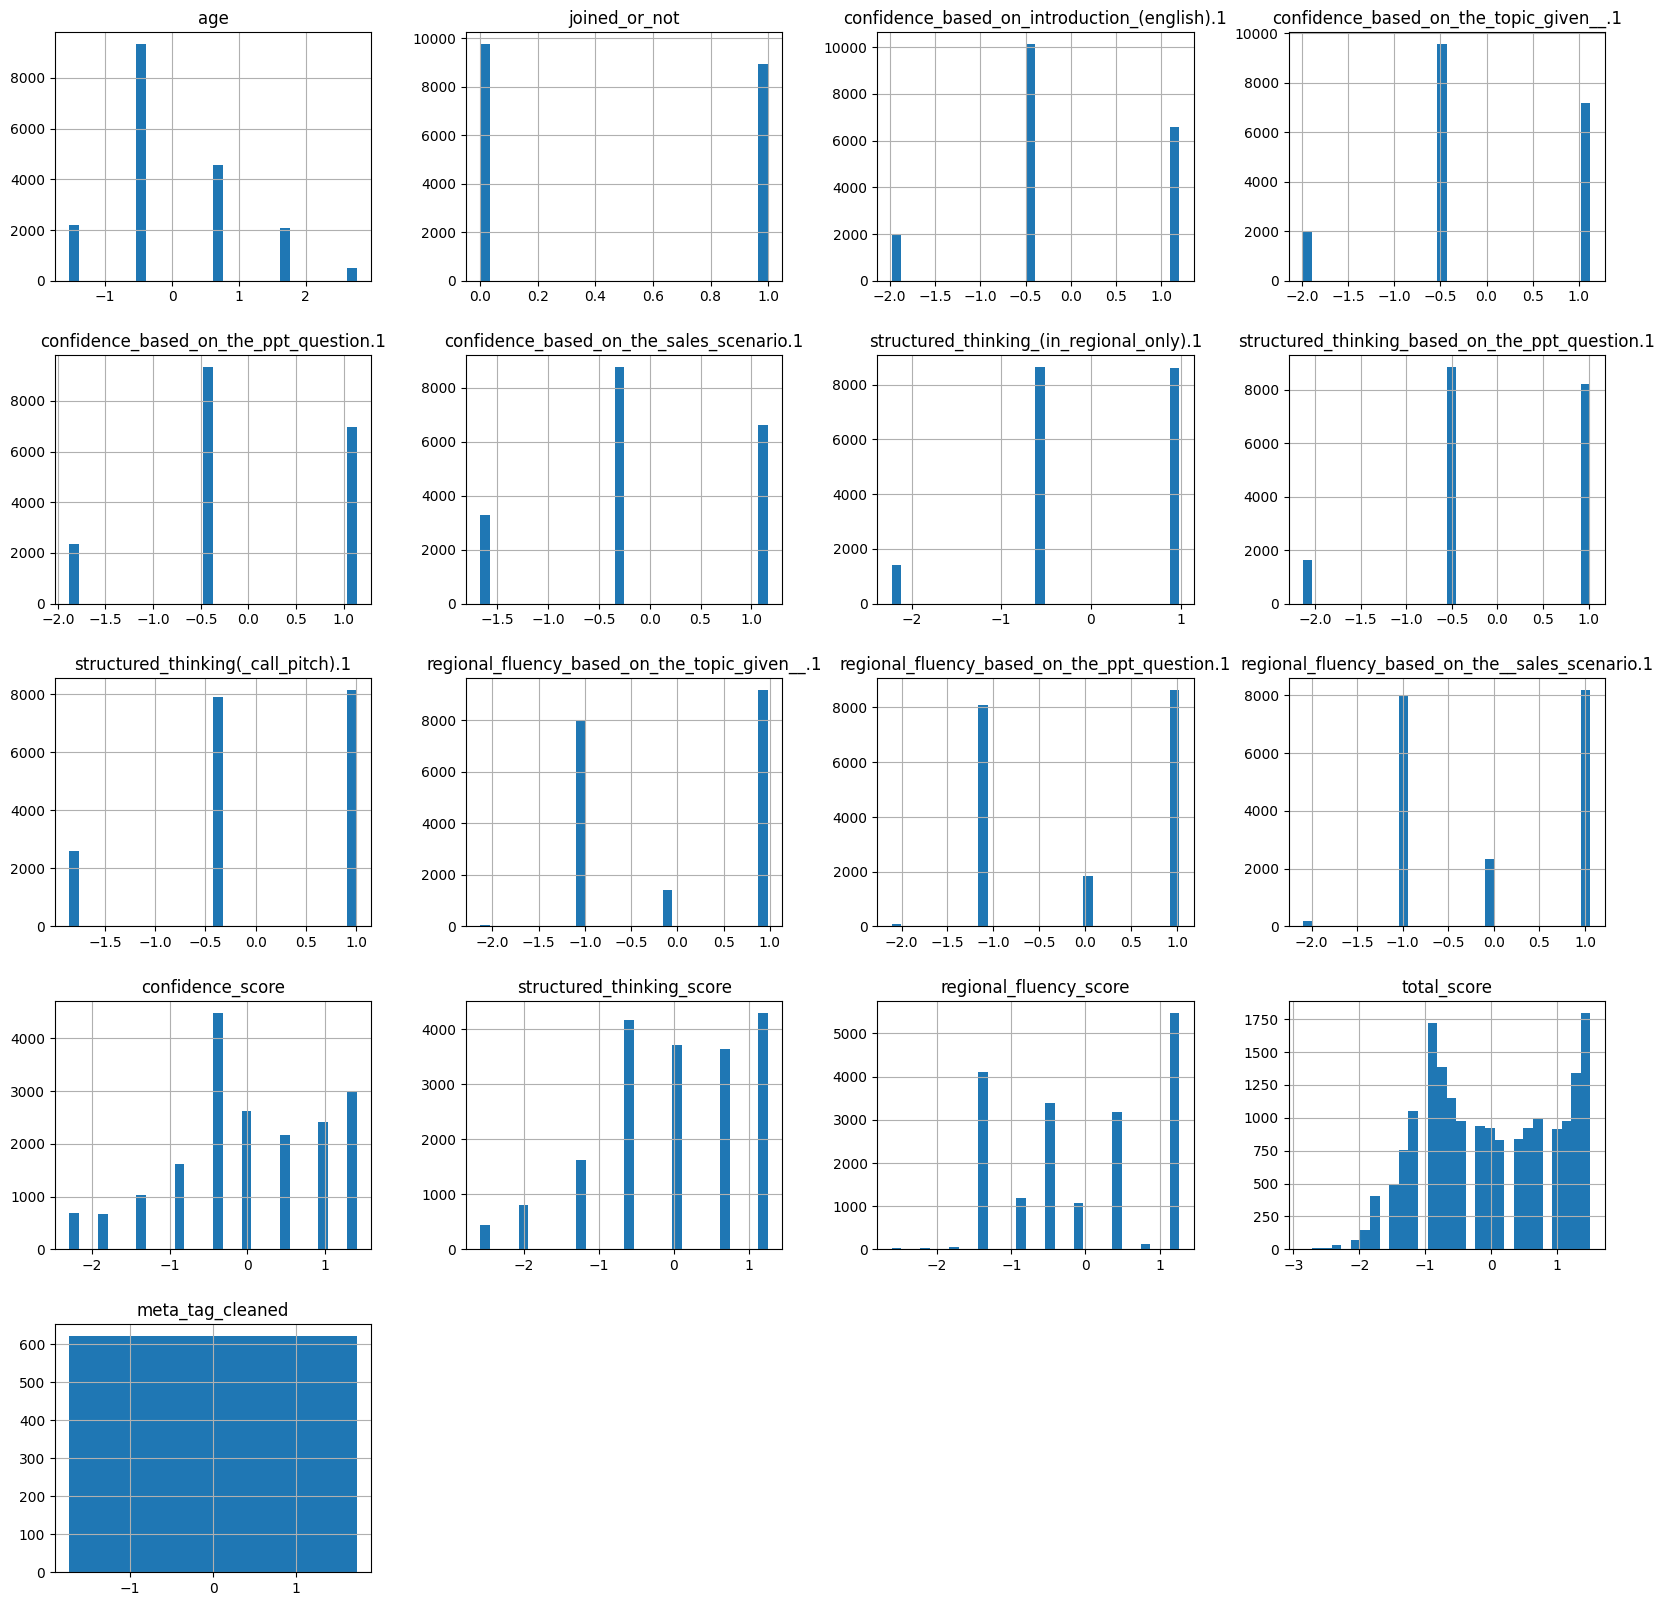

In [46]:
cleaned_df.hist(figsize=(20, 20), bins=30)
plt.show()

<Axes: xlabel='joined_or_not'>

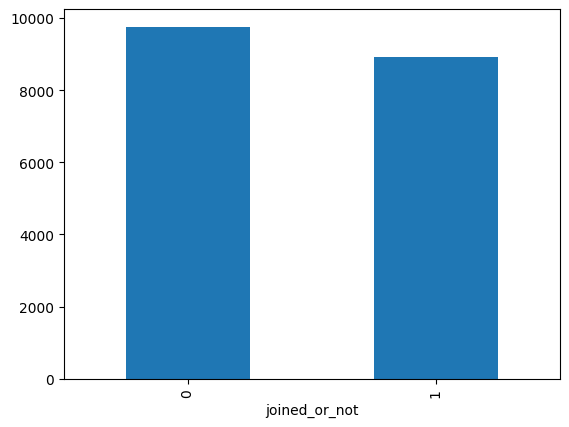

In [47]:
cleaned_df["joined_or_not"].value_counts().plot(kind="bar")

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data into train & test
X = cleaned_df.drop(columns=["joined_or_not"])
y = cleaned_df["joined_or_not"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5397377575595398


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.60      0.57      1936
           1       0.52      0.48      0.50      1801

    accuracy                           0.54      3737
   macro avg       0.54      0.54      0.54      3737
weighted avg       0.54      0.54      0.54      3737



# --------------------------------------Model training-------------------------------

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [51]:
X = cleaned_df.drop(columns=['joined_or_not']).values
y = cleaned_df['joined_or_not'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
len(X_train),len(y_train),len(X_test),len(y_test)

(14944, 14944, 3737, 3737)

In [53]:
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [54]:
y_test_tensor.shape

torch.Size([3737, 1])

In [55]:
y_train_tensor[1]

tensor([1.])

In [56]:
# Create DataLoader for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [57]:
train_dataset,test_dataset,train_loader,test_loader

(<torch.utils.data.dataset.TensorDataset at 0x7929266dd5a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7929266dfca0>)

In [58]:
len(test_loader),len(train_loader)

(117, 467)

In [59]:
class PredictionModel(nn.Module):
    def __init__(self, input_dim):
        super(PredictionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)  # Output layer
        self.relu = nn.LeakyReLU(negative_slope=0.01)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))  # Apply sigmoid to the final output layer
        return x

# Initialize model
input_dim = X_train.shape[1]  # Make sure X_train is defined earlier
model = PredictionModel(input_dim)
model


PredictionModel(
  (fc1): Linear(in_features=16, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
  (relu): LeakyReLU(negative_slope=0.01)
  (sigmoid): Sigmoid()
)

In [60]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [61]:
num_epochs = 20

# Lists to store metrics
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    # Training phase
    model.train()
    total_train_loss = 0
    correct_train = 0
    total_train = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()
        
        # Convert predictions to binary (0 or 1)
        predicted = (y_pred > 0.5).float()
        correct_train += (predicted == y_batch).sum().item()
        total_train += y_batch.size(0)

    train_loss = total_train_loss / len(train_loader)
    train_accuracy = correct_train / total_train

    # Evaluation phase
    model.eval()
    total_test_loss = 0
    correct_test = 0
    total_test = 0

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            total_test_loss += loss.item()
            
            predicted = (y_pred > 0.5).float()
            correct_test += (predicted == y_batch).sum().item()
            total_test += y_batch.size(0)

    test_loss = total_test_loss / len(test_loader)
    test_accuracy = correct_test / total_test

    # Store metrics for plotting
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    print(f"Epoch {epoch+1}/{num_epochs} | Train Loss:{train_loss:.3f} | Train Acc:{train_accuracy*100:.2f}% | Test Loss:{test_loss:.3f} |Test Acc:{test_accuracy*100:.2f}%")

Epoch 1/20 | Train Loss:0.685 | Train Acc:52.91% | Test Loss:0.685 |Test Acc:52.53%
Epoch 2/20 | Train Loss:0.680 | Train Acc:54.00% | Test Loss:0.685 |Test Acc:53.09%
Epoch 3/20 | Train Loss:0.679 | Train Acc:54.23% | Test Loss:0.685 |Test Acc:51.86%
Epoch 4/20 | Train Loss:0.677 | Train Acc:54.36% | Test Loss:0.685 |Test Acc:52.26%
Epoch 5/20 | Train Loss:0.676 | Train Acc:55.02% | Test Loss:0.684 |Test Acc:52.96%
Epoch 6/20 | Train Loss:0.674 | Train Acc:54.95% | Test Loss:0.688 |Test Acc:53.17%
Epoch 7/20 | Train Loss:0.673 | Train Acc:55.30% | Test Loss:0.688 |Test Acc:53.65%
Epoch 8/20 | Train Loss:0.672 | Train Acc:55.57% | Test Loss:0.690 |Test Acc:51.89%
Epoch 9/20 | Train Loss:0.671 | Train Acc:55.65% | Test Loss:0.688 |Test Acc:52.39%
Epoch 10/20 | Train Loss:0.669 | Train Acc:56.31% | Test Loss:0.694 |Test Acc:52.77%
Epoch 11/20 | Train Loss:0.668 | Train Acc:56.33% | Test Loss:0.692 |Test Acc:52.66%
Epoch 12/20 | Train Loss:0.666 | Train Acc:56.86% | Test Loss:0.696 |Test 

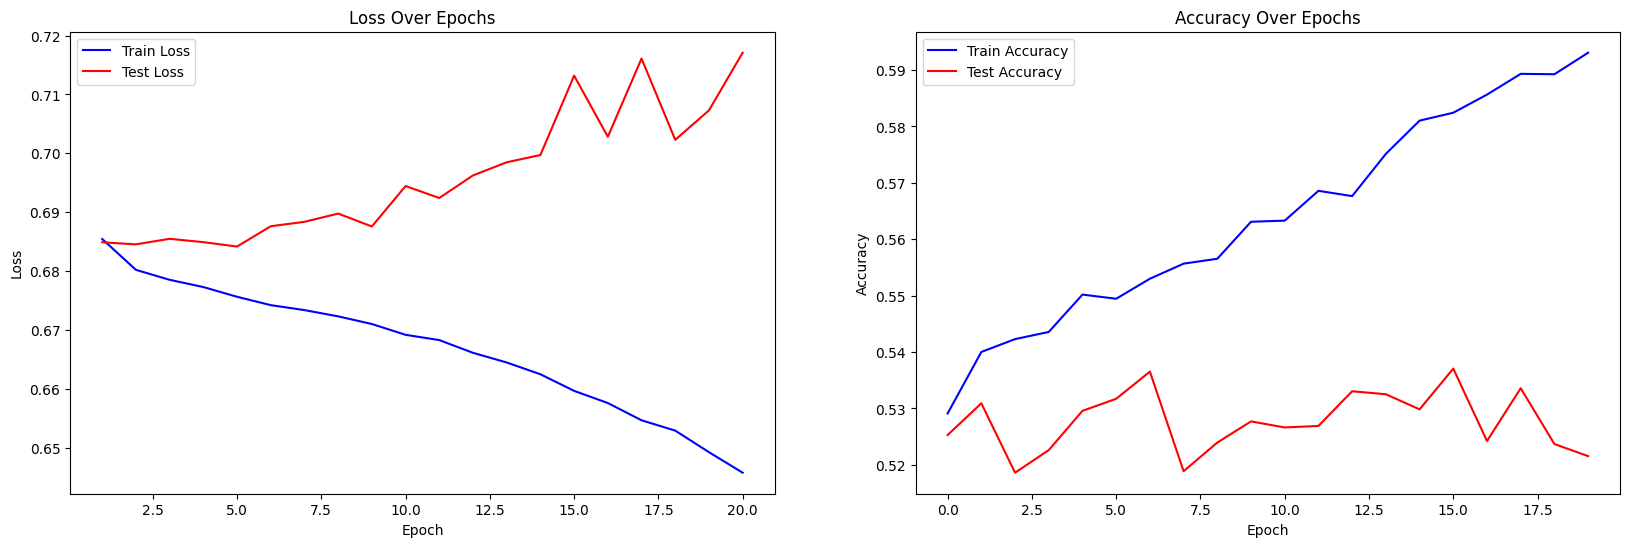

In [62]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
# Plot Loss
ax[0].plot(range(1, num_epochs + 1), train_losses, label="Train Loss", color='blue')
ax[0].plot(range(1, num_epochs + 1), test_losses, label="Test Loss", color='red')
ax[0].set_title("Loss Over Epochs")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].legend()

# Plot Accuracy
ax[1].plot(train_accuracies, label="Train Accuracy", color='blue')
ax[1].plot(test_accuracies, label="Test Accuracy", color='red')
ax[1].set_title("Accuracy Over Epochs")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].legend()

plt.show()